In [53]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [54]:
START = '2018Q1'
END = '2023Q4'

PURPLE = '#6935FF'
GREEN = '#3A4934'
WHITE = '#FAF7F3'

matplotlib.rcParams.update({'font.family': 'monospace'})

In [55]:
project_names = pd.read_json("data/gitcoin-project-names.json").set_index('slug')['name'].to_dict()

In [56]:
impact = pd.read_csv("data/csv/gitcoin_contributor_impact_by_quarter.csv", index_col=0)
impact = impact[(impact['quarter'] >= START) & (impact['quarter'] <= END)]
impact = impact[impact['project_slug'] != 'gitcoin']
impact.rename(columns={'day': 'days_contributed'}, inplace=True)

top50_oss_slugs = (    
    impact
    .groupby('project_slug')
    ['from_name']
    .nunique()
    .sort_values()
    .tail(50)
    .index
    .to_list()
)
impact = impact[impact['project_slug'].isin(top50_oss_slugs)]

impact.head(1)

,project_slug,from_name,quarter,days_contributed
0,4everland,2062686364,2021Q3,1


In [57]:
unique_contributors = impact['from_name'].nunique()
print(f"Number of unique contributors: {unique_contributors}")

Number of unique contributors: 19620


In [58]:
# Create a DataFrame with each contributor and a list of unique projects they've contributed to
project_slugs_list = (
    impact
    .groupby(['from_name'])
    .agg({'project_slug': lambda x: list(set(x))})
    .rename(columns={'project_slug': 'project_slugs_list'})
)

# Add a new column for the count of unique projects
project_slugs_list['count_of_unique_projects'] = project_slugs_list['project_slugs_list'].apply(len)

# Sort by 'count_of_unique_projects' and 'from_name'
project_slugs_list = project_slugs_list.sort_values(by=['count_of_unique_projects','from_name'], ascending=False)

project_slugs_list.head(20)

,project_slugs_list,count_of_unique_projects
from_name,,
omahs,"[fileverse, buidlguidl, dapp-learning-dao, giveth, dappnode, ethhub-io, scope-lift, ethers-io, tapexyz, ethstaker, revoke-cash, wighawag, lighthouse-sigp, beacon-chain, brightid, nethermindeth, trueblocks, hardhat-nomicfoundation, prysmaticlabs, blockscout, clrfund, l2beat, banklessdao, wagmi-dev, lifinance, rotki, snapshot-labs, walletconnect, nicenode, defi-llama]",30
aspiers,"[ethers-io, buidlguidl, banklessdao, nethermindeth, hardhat-nomicfoundation, rotki, snapshot-labs, walletconnect, scope-lift, wighawag]",10
PaulRBerg,"[ethers-io, frame-floating, hardhat-nomicfoundation, rotki, snapshot-labs, blockscout, walletconnect, scope-lift, l2beat, defi-llama]",10
MicahZoltu,"[ethers-io, fileverse, ethstaker, nethermindeth, hardhat-nomicfoundation, prysmaticlabs, snapshot-labs, walletconnect, beacon-chain, l2beat]",10
vuittont60,"[buidlguidl, wagmi-dev, nethermindeth, trueblocks, prysmaticlabs, snapshot-labs, beacon-chain, l2beat, defi-llama]",9
vporton,"[brightid, wagmi-dev, nethermindeth, hardhat-nomicfoundation, giveth, tor-project, blockscout, walletconnect, wighawag]",9
dmihal,"[crypto-fees-dmihal, ethers-io, buidlguidl, hardhat-nomicfoundation, rotki, revoke-cash, walletconnect, wighawag, defi-llama]",9
MysticRyuujin,"[lighthouse-sigp, frame-floating, nethermindeth, trueblocks, rotki, prysmaticlabs, dappnode, ethhub-io, beacon-chain]",9
yalexis-eth,"[ethers-io, stake-house, lighthouse-sigp, trueblocks, hardhat-nomicfoundation, dappnode, proof-of-humanity, beacon-chain]",8


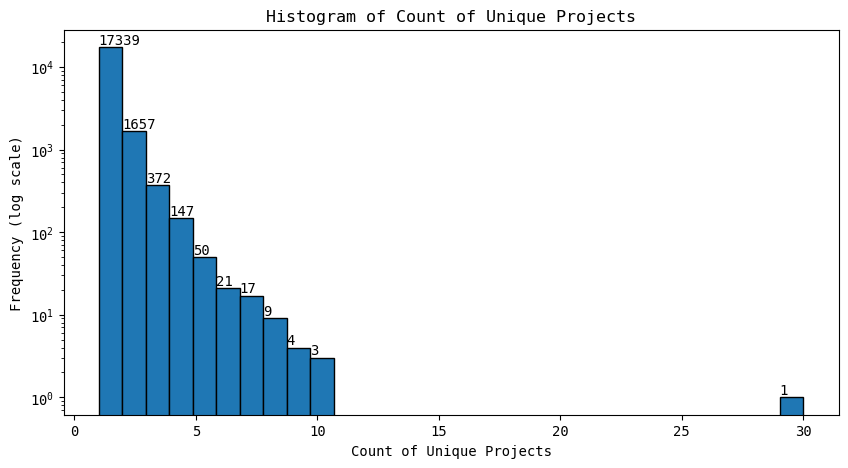

In [59]:
# Create a histogram of 'count_of_unique_projects'
plt.figure(figsize=(10, 5))  # Adjust the figure size to prevent the ValueError
counts, bins, patches = plt.hist(project_slugs_list['count_of_unique_projects'], bins=30, edgecolor='black', log=True)

# Add count labels on top of each bar
for count, bin, patch in zip(counts, bins, patches):
    height = patch.get_height()
    if height > 0:  # Only add labels when the height is greater than 0
        plt.text(bin, height, str(int(count)), va='bottom', ha='left')

plt.title('Histogram of Count of Unique Projects')
plt.xlabel('Count of Unique Projects')
plt.ylabel('Frequency (log scale)')
plt.show()


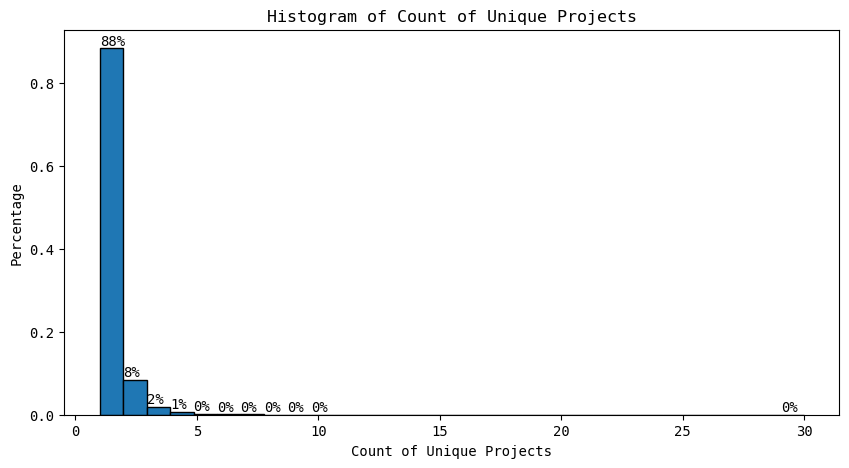

In [60]:
# Create a histogram of 'count_of_unique_projects'
plt.figure(figsize=(10, 5))  # Adjust the figure size to prevent the ValueError
weights = np.ones_like(project_slugs_list['count_of_unique_projects']) / len(project_slugs_list['count_of_unique_projects'])
counts, bins, patches = plt.hist(project_slugs_list['count_of_unique_projects'], bins=30, edgecolor='black', weights=weights)

# Add percentage labels on top of each bar
for count, bin, patch in zip(counts, bins, patches):
    height = patch.get_height()
    if height > 0:  # Only add labels when the height is greater than 0
        plt.text(bin, height, f"{count*100:.0f}%", va='bottom', ha='left')

plt.title('Histogram of Count of Unique Projects')
plt.xlabel('Count of Unique Projects')
plt.ylabel('Percentage')
plt.show()

In [41]:
# Calculate the percentage of contributors with more than one unique project
contributors_with_more_than_one_project = project_slugs_list[project_slugs_list['count_of_unique_projects'] > 1].shape[0]
total_contributors = project_slugs_list.shape[0]
percentage = (contributors_with_more_than_one_project / total_contributors) * 100

print(f"Percentage of contributors with more than one unique project: {percentage}%")

Percentage of contributors with more than one unique project: 13.447906573512164%


In [5]:
grants = pd.read_csv("data/csv/gitcoin_top_oss_grantees.csv", index_col=0)
grants['quarter'] = pd.PeriodIndex(grants.round_date, freq='Q')
grants['quarter'] = grants['quarter'].apply(str)

grants = grants[['oso_slug', 'round_id', 'round_name', 'quarter', 'round_date', 'total_usd']]
grants = grants[grants['oso_slug'].isin(top50_oss_slugs)]

def name_round(rid, rname):
    if '0x' in rid:
        return rname
    else:
        return f"GR{rid}"
grants['round'] = grants.apply(lambda x: name_round(x['round_id'], x['round_name']), axis=1)

# manual updates to clean a few rounds that are on the edge of a quarter
grants.loc[grants['round'] == 'GR2', 'quarter'] = '2019Q2'
grants.loc[grants['round'] == 'GR4', 'quarter'] = '2019Q4'

# rename allo grants
grants.loc[grants['quarter'] == '2023Q1', 'round'] = 'Alpha'
grants.loc[grants['quarter'] == '2023Q2', 'round'] = 'Beta'
grants.loc[grants['quarter'] == '2023Q3', 'round'] = 'GG18'
grants.loc[grants['quarter'] == '2023Q4', 'round'] = 'GG19'

grants.head(1)

,oso_slug,round_id,round_name,quarter,round_date,total_usd,round
18,l2beat,0x222ea76664ed77d18d4416d2b2e77937b76f0a35,Ethereum Infrastructure,2023Q3,2023-08-17 08:00:00,30127.21813,GG18


In [6]:
grant_stats = grants.groupby(['quarter','round'])['total_usd'].sum().apply(int)
grant_stats.sum()

8291443

In [7]:
impact

,project_slug,from_name,quarter,days_contributed
0,4everland,2062686364,2021Q3,1
1,4everland,4everlandorg,2023Q1,1
2,4everland,4everlandorg,2023Q3,1
3,4everland,Alexandas,2022Q1,3
4,4everland,Alexandas,2022Q2,1
...,...,...,...,...
39029,zeropoolnetwork,voidxnull,2023Q1,23
39030,zeropoolnetwork,voidxnull,2023Q2,24
39031,zeropoolnetwork,voidxnull,2023Q3,9
39032,zeropoolnetwork,voidxnull,2023Q4,6


In [8]:
projects_first_rounds = (
    grants
    .groupby(['oso_slug'])
    ['quarter']
    .min()
    .reset_index()
    .groupby('quarter')
    ['oso_slug']
    .agg(lambda x: sorted(x))
)
ordered_projects_list = [p for lst in projects_first_rounds for p in lst]
projects_first_rounds.head(2)

quarter
2019Q1    [ethers-io, lighthouse-sigp, prysmaticlabs]
2019Q3                      [dappnode, nethermindeth]
Name: oso_slug, dtype: object

In [9]:
quarters = sorted(impact['quarter'].unique())
quarter_mapping = dict(zip(quarters, range(len(quarters))))

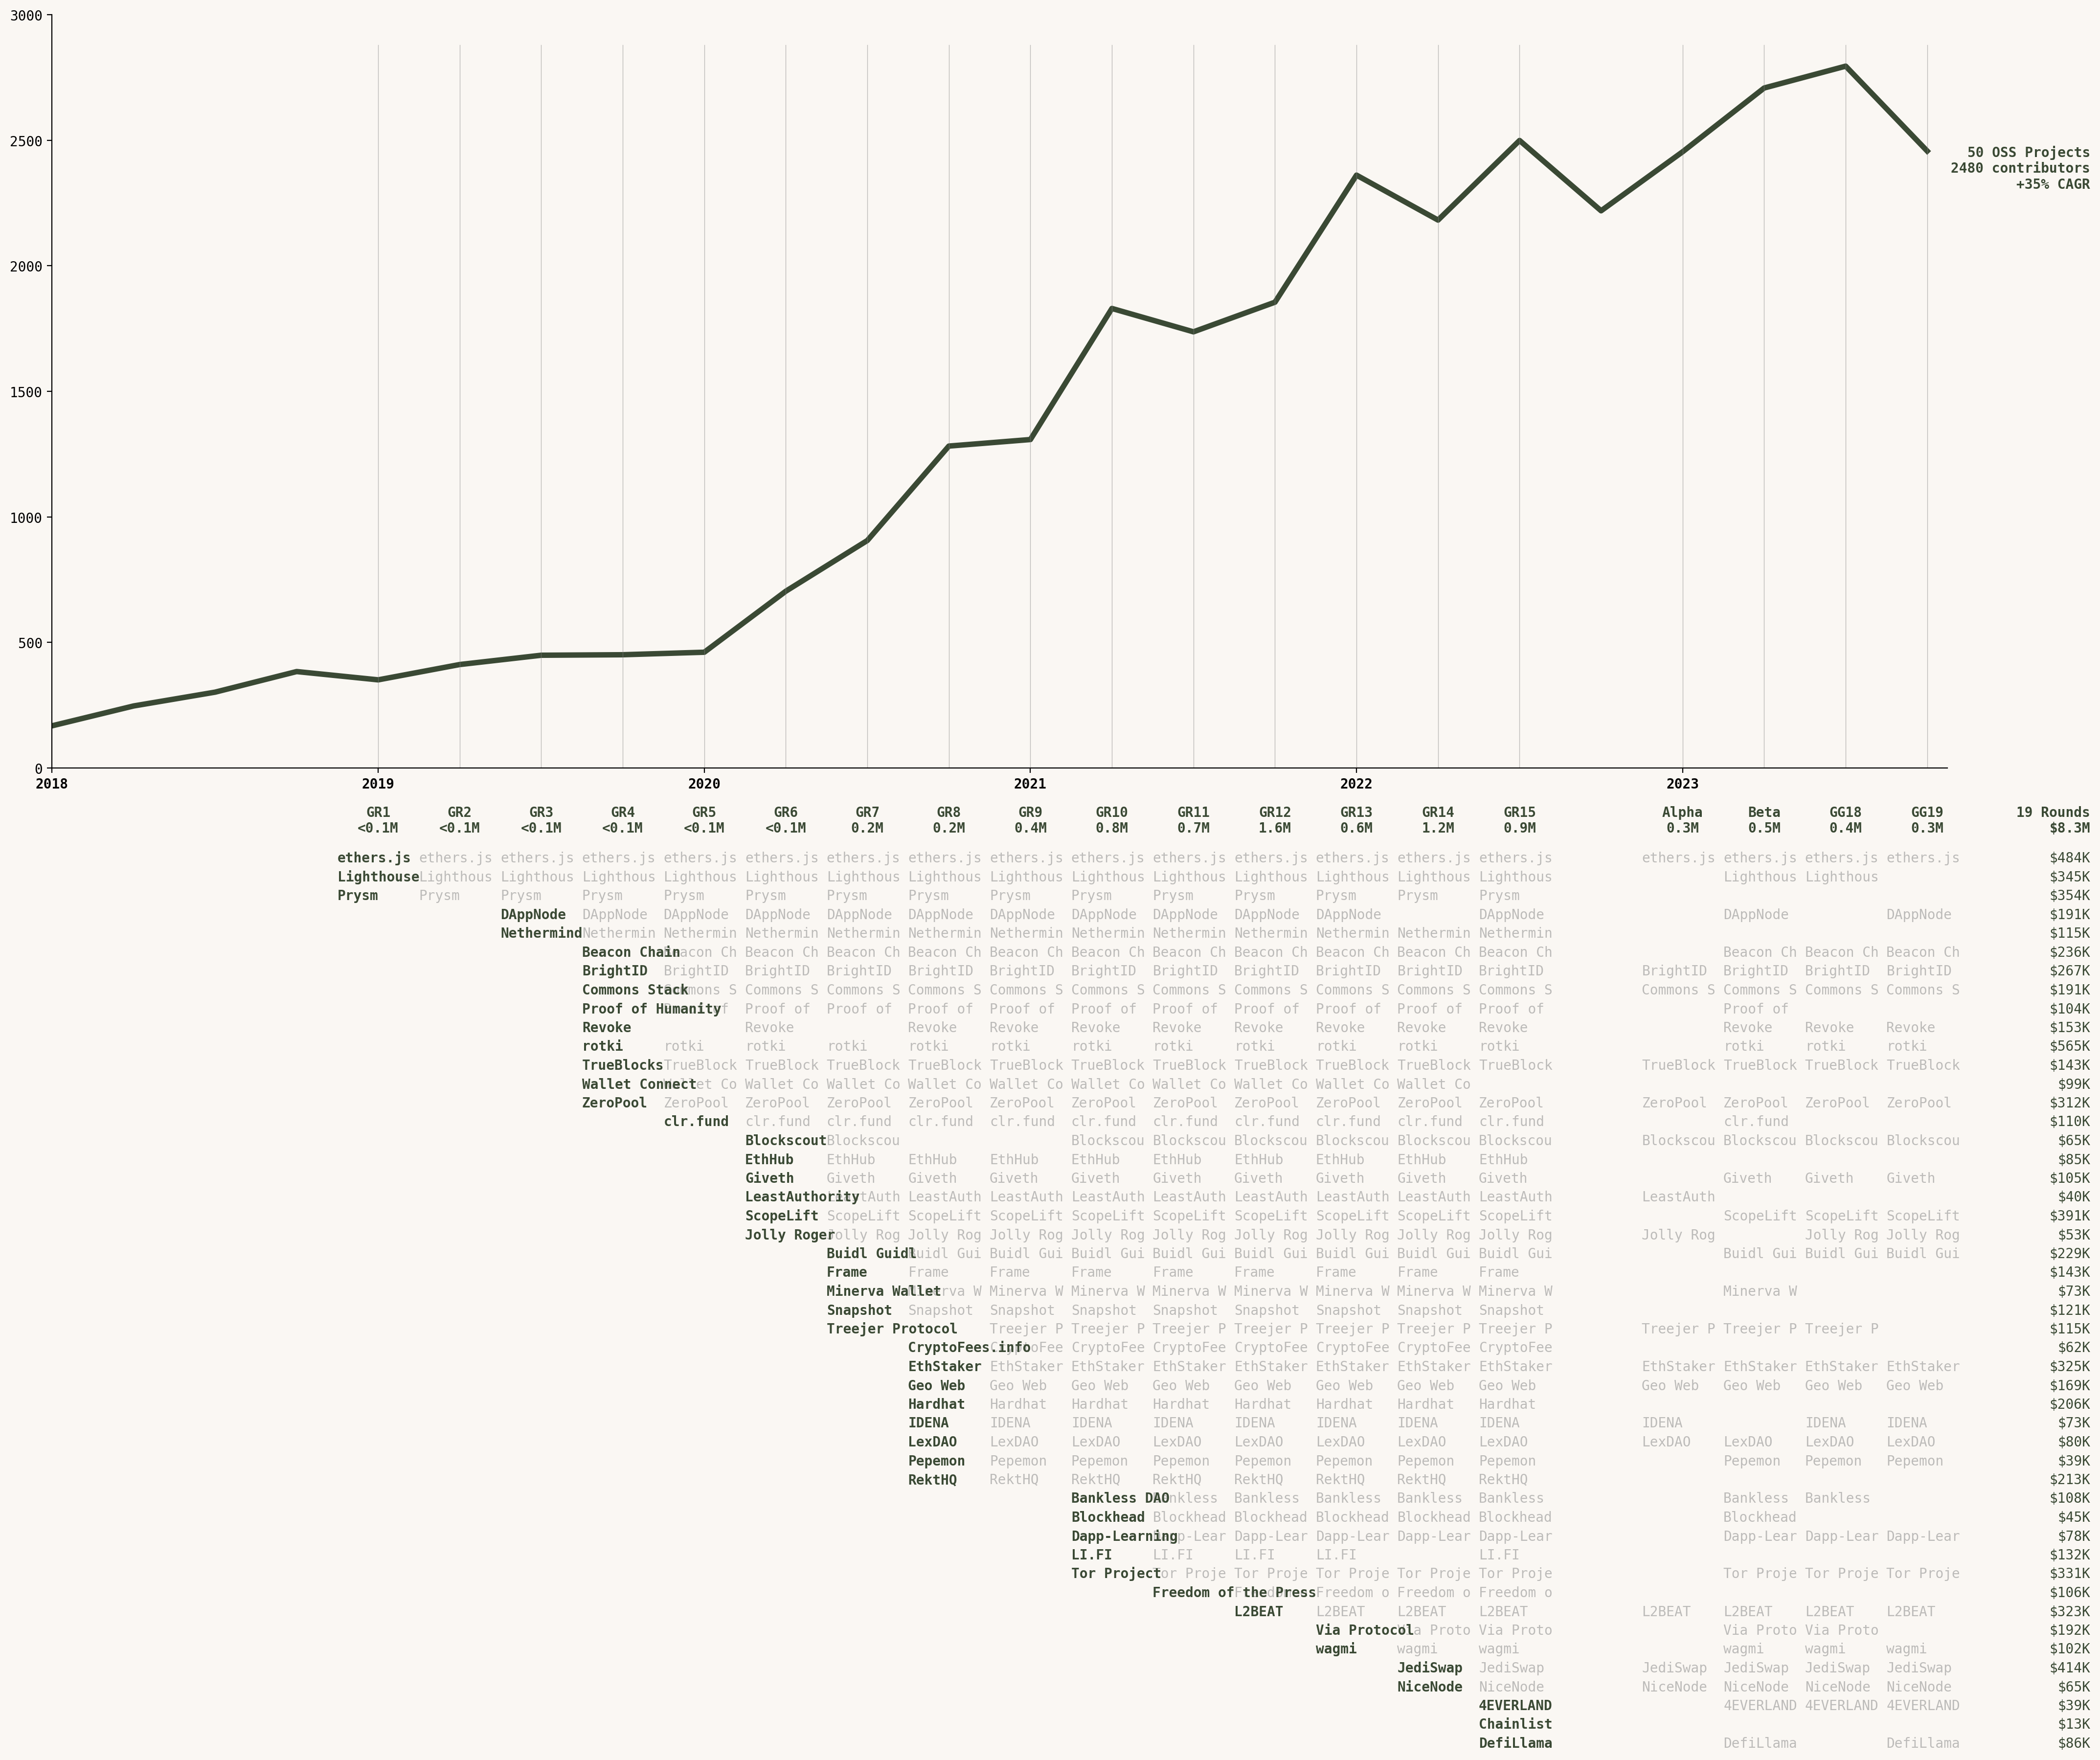

In [49]:
# plot the impact metric
fig, ax = plt.subplots(figsize=(25,10), dpi=200, facecolor=WHITE)
(
    impact
    .groupby('quarter')
    ['from_name']
    .nunique()
    .plot(
        kind='line', 
        lw=4,
        ax=ax, 
        color=GREEN
    )
)
max_y = 3000
small_font = 10

# add vertical lines signifying funding events     
amt_fmt = lambda a: "<0.1M" if a < 100_000 else f"{a/1_000_000:.1f}M"
for i, ((quarter, round_name), amount) in enumerate(grant_stats.items()):
    x = quarter_mapping.get(quarter)
    if not x:
        continue
    amt = amt_fmt(amount)
    label = f"{round_name}\n{amt}"
    ax.text(s=label, x=x, y=-150, ha='center', va='top', fontsize=small_font, color=GREEN, weight='bold')
    ax.axvline(x=x, ymin=0, ymax=.96, color='grey', lw=.5, alpha=.5)
    
    # add project first funding dates
    first_round_projects = projects_first_rounds.get(quarter)
    for y, project_slug in enumerate(ordered_projects_list):
        included_projects = grants[grants['quarter'] == quarter]['oso_slug'].to_list()
        if project_slug not in included_projects:
            continue
        color = 'grey'
        weight = None
        name = project_names[project_slug]
        zorder = 1
        alpha = 1
        if first_round_projects and project_slug in first_round_projects:
            color = GREEN
            weight = 'bold'
        else:
            zorder = 0
            name = name[:9]
            alpha = .5
        ax.text(s=name, x=x-.5, y=-375-(y*75), color=color, weight=weight, zorder=zorder, alpha=alpha)


# add quarter and year tick labels
interval = 4
quarters_list = list(quarter_mapping.keys())    
start_q, end_q = quarter_mapping.get(START), quarter_mapping.get(END)
ax.set_xlim(start_q, end_q+.25)    
xs = list(range(0, len(quarters_list), interval))    
ax.set_xticks(xs) 
ax.set_xticklabels([str(x) for x in range(2018,2024)], weight='bold')

# add summary metrics
ax.text(s=f"19 Rounds\n${amt_fmt(grant_stats.sum())}", x=end_q+2, y=-150, weight='bold', ha='right', va='top', color=GREEN)
ax.text(s="\n".join(["50 OSS Projects", "2480 contributors", "+35% CAGR"]), 
        x=end_q+2, y=2480, weight='bold', ha='right', va='top', color=GREEN)
for y, project_slug in enumerate(ordered_projects_list):
    funding = grants[grants['oso_slug'] == project_slug]['total_usd'].sum()
    ax.text(s=f"${funding/1000:,.0f}K", x=end_q+2, y=-375-(y*75), ha='right', color=GREEN)
    

    
# styling tweaks    
ax.set_ylim(0,3000)
ax.set_xlabel("")

ax.set_ylabel("")
ax.set_facecolor(WHITE)
sns.despine()    
#fig.tight_layout()

# old version

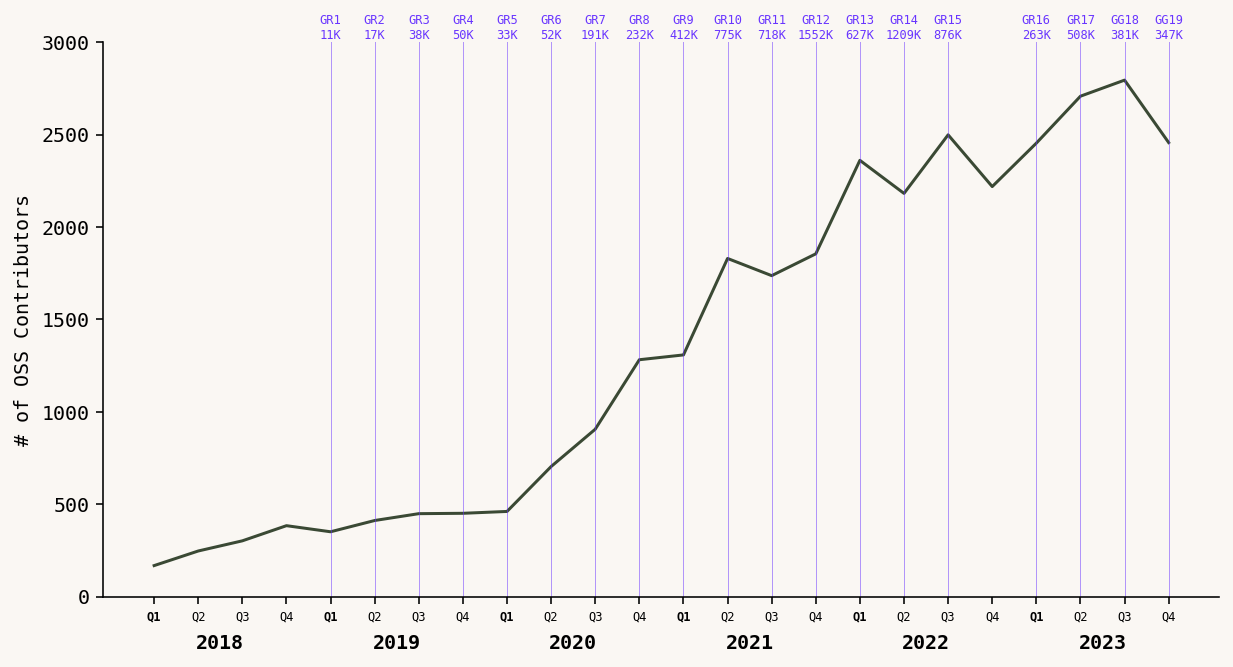

In [11]:
fig, ax = plt.subplots(figsize=(10,5), dpi=144, facecolor=WHITE)
(
    impact
    .groupby('quarter')
    ['from_name']
    .nunique()
    .apply(int)
    .plot(
        kind='line', 
        ax=ax, 
        color=GREEN
    )
)


quarters_list = list(quarter_mapping.keys())    
grant_streams = grants.groupby('quarter')['total_usd'].sum()
grant_streams = grant_streams[grant_streams>0]
for i, (quarter, amount) in enumerate(grant_streams.items()):
    q = quarter_mapping.get(quarter)
    lbl = f"GR{i+1}" if i < 17 else f"GG{i+1}"
    lbl += f"\n{amount/1000:.0f}K"
    ax.text(s=lbl, x=q, y=3000, ha='center', va='bottom', fontsize=6, color=PURPLE)
    ax.axvline(x=q, color=PURPLE, lw=.5, alpha=.5)
    
# add quarter and year tags
start_q, end_q = quarter_mapping.get("2017Q1"), quarter_mapping.get("2023Q4")
ax.set_xlim(start_q, )    
xs = list(range(0, len(quarters_list), 1))    
ax.set_xticks(xs) 
ax.set_xticklabels([quarters_list[x][-2:] for x in xs], fontsize=6)
[ax.get_xticklabels()[i].set_weight("bold") for i in range(len(xs)) if not(i % 4)]
for i,x in enumerate(quarters_list[::4]):
    year = x[:4]
    ax.text(s=year, x=(i*4+1.5), y=-200, ha="center", va='top', weight='bold')

ax.set_ylim(0,3000)
ax.set_xlabel("")
ax.set_ylabel("# of OSS Contributors")
ax.set_facecolor(WHITE)
sns.despine()